# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БФИ2001 Лушин Евгений Александрович
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

**Алгоритм Флойда-Уоршелла**| **Алгоритм Дейкстры** | **Алгоритм Беллмана-Форда** | Алгоритм Джонсона | **Алгоритм Левита** | **Алгоритм Йена**



### Выполнение:

In [1]:
import sys
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

### 1) Алгоритм Флойда-Уоршелла

Найден следующий лучший маршрут с ценностью 26.
A -> B -> E -> I


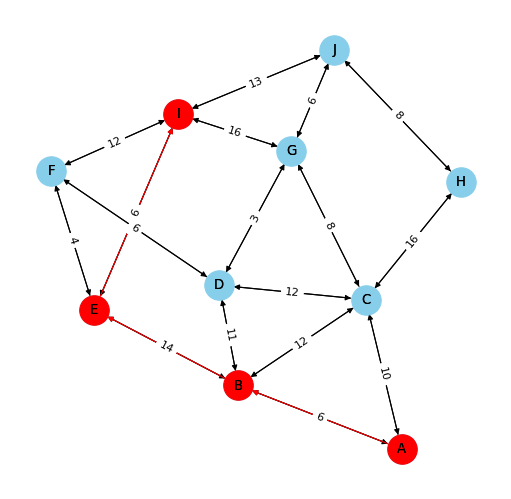

In [2]:
def print_graph(matrix, path):
    G = nx.DiGraph()
    H = nx.DiGraph()
    for el1, vector in enumerate(matrix):
        for el2, w in enumerate(vector):
            if w > 0:
                G.add_edge(chr(el1+65), chr(el2+65), weight=w)
    for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]:
                        H.add_edge(chr(el1+65), chr(el2+65), weight=w)
    edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
    node_labels = {node:node for node in G.nodes()}

    # Установка параметров вывода
    plt.figure(num=None, figsize=(8, 8), dpi=80)
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw(G, pos, node_size = 700, node_color = '#87CEEB')

    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(H, pos, labels=node_labels)
    nx.draw(H, pos, node_size = 700, node_color = '#FF0000', edge_color='#FF0000')

    plt.show()

def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

def get_path(P, u, v):
    path = [u]
    while u != v:
        u = P[u][v]
        path.append(u)
    return path

def Floyd_Warshell():
    V = read_matrix('../Lab6_matrix/1.txt')
    for i, vector in enumerate(V):
        for j, w in enumerate(vector):
            if V[i][j] == 9999:
                V[i][j] = math.inf
    N = len(V)                       # число вершин в графе
    P = [[v for v in range(N)] for u in range(N)]       # начальный список предыдущих вершин для поиска кратчайших маршрутов
    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = V[i][k] + V[k][j]
                if V[i][j] > d:
                    V[i][j] = d
                    P[i][j] = k     # номер промежуточной вершины при движении от i к j
    return P

# нумерацця вершин начинается с нуля
matrix = read_matrix('../Lab6_matrix/1.txt')

for i, vector in enumerate(matrix):
    for j, w in enumerate(vector):
        if matrix[i][j] == 9999:
            matrix[i][j] = 0

start = ord('A')-65
end = ord('I')-65
path = get_path(Floyd_Warshell(), end, start)

path.reverse()

count = 0
for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]:
                        count = count + w
print("Найден следующий лучший маршрут с ценностью {}.".format(count))

shortcut = copy.deepcopy(path)
for i in range (len(shortcut)):
        shortcut[i] = chr(shortcut[i]+65)
print(" -> ".join(shortcut))

print_graph(matrix, path)

### 2) Алгоритм Дейкстры

Найден следующий лучший маршрут с ценностью 9999.
A -> I


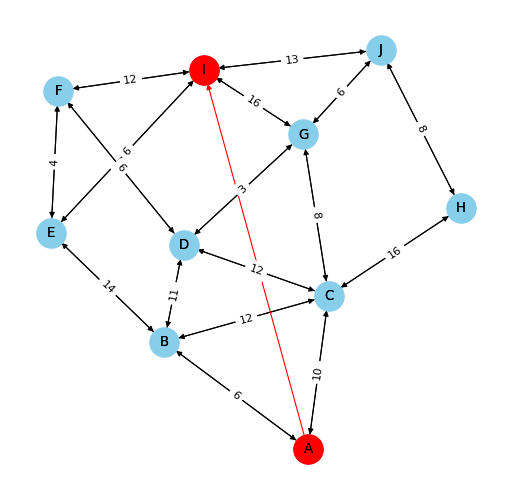

In [3]:
def print_graph(matrix, path):
    G = nx.DiGraph()
    H = nx.DiGraph()
    for el1, vector in enumerate(matrix):
        for el2, w in enumerate(vector):
            if w > 0:
                G.add_edge(chr(el1+65), chr(el2+65), weight=w)
    for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        H.add_edge(chr(el1+65), chr(el2+65), weight=w)
    edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
    node_labels = {node:node for node in G.nodes()}

    # Установка параметров вывода
    plt.figure(num=None, figsize=(8, 8), dpi=80)
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw(G, pos, node_size = 700, node_color = '#87CEEB')

    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(H, pos, labels=node_labels)
    nx.draw(H, pos, node_size = 700, node_color = '#FF0000', edge_color='#FF0000')

    plt.show()

def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

def d_get_path(path, start, end):
    result = [end]
    while end != start:
        end = path[end]
        result.append(end)
    for i in range(len(result)):
        result[i] += 1
    return result[::-1]

def dijkstra_path(matrix, start, end):
    start -= 1
    end -= 1
    dist = [matrix[start][i] for i in range(len(matrix))]
    prev = [start for i in range(len(matrix))]
    checked_nodes = set()
    checked_nodes.add(start)
    for i in range(len(matrix)):
        node = 0
        for i in range(len(matrix)):
            if dist[i] < math.inf and i not in checked_nodes:
                node = i
        if node:
            checked_nodes.add(node)
            for i in range(len(matrix)):
                if dist[i] > matrix[node][i] + dist[node]:
                    dist[i] = matrix[node][i] + dist[node]
                    prev[i] = node
    if dist[end] == math.inf:
        return [], dist
    else:
        return d_get_path(prev, start, end), dist
    
matrix = read_matrix('../Lab6_matrix/1.txt')
copy_matrix = copy.deepcopy(matrix)

for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = 0

start = ord('A')-64
end = ord('I')-64
path, d = dijkstra_path(copy_matrix, start, end)

print("Найден следующий лучший маршрут с ценностью {}.".format(d[end-1]))
shortcut = copy.deepcopy(path)
for i in range (len(shortcut)):
        shortcut[i] = chr(shortcut[i]+64)
print(" -> ".join(shortcut))

print_graph(matrix, path)

### 3) Алгоритм Беллмана-Форда

Найден следующий лучший маршрут с ценностью 26.
A -> B -> E -> I


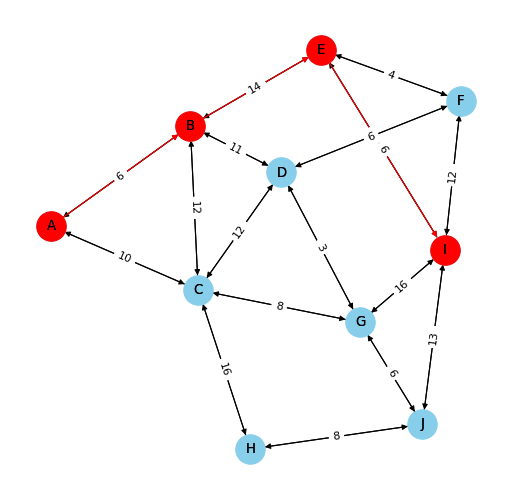

In [4]:
def print_graph(matrix, path, d):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = 0
    G = nx.DiGraph()
    H = nx.DiGraph()
    for el1, vector in enumerate(matrix):
        for el2, w in enumerate(vector):
            if w > 0:
                G.add_edge(chr(el1+65), chr(el2+65), weight=w)
    for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        H.add_edge(chr(el1+65), chr(el2+65), weight=w)
    edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
    node_labels = {node:node for node in G.nodes()}

    # Установка параметров вывода
    plt.figure(num=None, figsize=(8, 8), dpi=80)
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw(G, pos, node_size = 700, node_color = '#87CEEB')

    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(H, pos, labels=node_labels)
    nx.draw(H, pos, node_size = 700, node_color = '#FF0000', edge_color='#FF0000')

    plt.show()


def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

 
def bellman_ford_path(matrix, start, end):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = math.inf
    edges = []
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j and matrix[i][j] < math.inf:
                edges.append((i,j,matrix[i][j]))
    start -= 1
    end -= 1
    from_pos = 0
    to_pos = 1
    edge_length = 2
    d = [math.inf] * len(matrix)
    d[start] = 0
    p = [-1] * len(matrix)
    while True:
        flag = False
        for j in range(len(edges)):
            if d[edges[j][from_pos]] < math.inf:
                if d[edges[j][to_pos]] > d[edges[j][from_pos]] + edges[j][edge_length]: 
                    d[edges[j][to_pos]] = d[edges[j][from_pos]] + edges[j][edge_length]
                    p[edges[j][to_pos]] =  edges[j][from_pos]
                    flag = True
        if not flag:  
            break
    if d[end] == math.inf:
        return [], d
    else:
        path = []
        cur = end
        while cur != -1:
            path.append(cur)
            cur=p[cur]
        for i in range(len(path)):
            path[i] += 1
        return path[::-1], d


matrix = read_matrix('../Lab6_matrix/1.txt')
copy_matrix = copy.deepcopy(matrix)

start = ord('A')-64
end = ord('I')-64
path, d = bellman_ford_path(copy_matrix, start, end)

print("Найден следующий лучший маршрут с ценностью {}.".format(d[end-1]))
shortcut = copy.deepcopy(path)
for i in range (len(shortcut)):
        shortcut[i] = chr(shortcut[i]+64)
print(" -> ".join(shortcut))

print_graph(matrix, path, d)

### 4) Алгоритм Джонсона

Найден следующий лучший маршрут с ценностью 20.
A -> B -> E


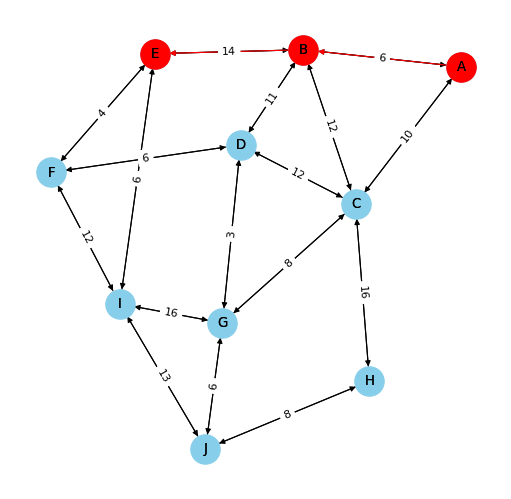

In [5]:



def print_graph(matrix, path):
    G = nx.DiGraph()
    H = nx.DiGraph()
    for el1, vector in enumerate(matrix):
        for el2, w in enumerate(vector):
            if w > 0:
                G.add_edge(chr(el1+65), chr(el2+65), weight=w)
    for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        H.add_edge(chr(el1+65), chr(el2+65), weight=w)
    edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
    node_labels = {node:node for node in G.nodes()}

    # Установка параметров вывода
    plt.figure(num=None, figsize=(8, 8), dpi=80)
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw(G, pos, node_size = 700, node_color = '#87CEEB')

    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(H, pos, labels=node_labels)
    nx.draw(H, pos, node_size = 700, node_color = '#FF0000', edge_color='#FF0000')

    plt.show()


def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

 
def johnsons_path(matrix, start, end):      
    start -= 1
    end -= 1
    bf_path, bf_dist = bellman_ford_path(copy.deepcopy(matrix), start, end) 
    
    if bf_dist == []: 
        return []
    
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf and bf_dist[i] != math.inf and bf_dist[j] != math.inf:
                matrix[i][j] += bf_dist[i] - bf_dist[j]
    
    paths = []
    dist = []
    for i in range(len(matrix)):
        p, d = dijkstra_path(matrix, i + 1, end + 1)
        paths.append(p)
        dist.append(d)
        
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if dist[i][j] != math.inf and bf_dist[i] != math.inf and bf_dist[j] != math.inf:
                dist[i][j] +=  bf_dist[j] - bf_dist[i]
    return paths[start]


matrix = read_matrix('../Lab6_matrix/1.txt')
copy_matrix = copy.deepcopy(matrix)

for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = 0

start = ord('A')-64
end = ord('E')-64
path = johnsons_path(copy_matrix, start, end)

count = 0
for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        count = count + w

print("Найден следующий лучший маршрут с ценностью {}.".format(count))
shortcut = copy.deepcopy(path)
for i in range (len(shortcut)):
        shortcut[i] = chr(shortcut[i]+64)
print(" -> ".join(shortcut))

print_graph(matrix, path)

### 5) Алгоритм Левита

Найден следующий лучший маршрут с ценностью 26.
A -> B -> E -> I


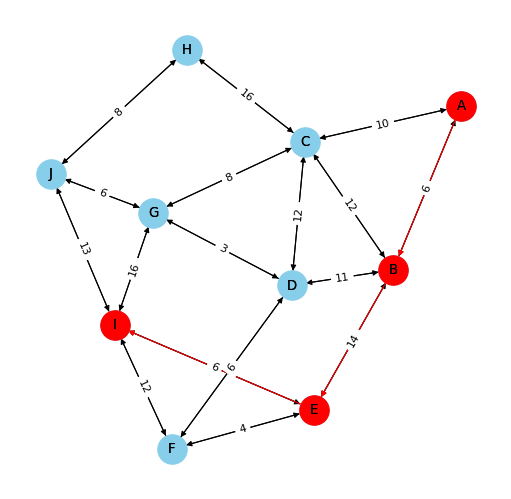

In [6]:
def print_graph(matrix, path):
    G = nx.DiGraph()
    H = nx.DiGraph()
    for el1, vector in enumerate(matrix):
        for el2, w in enumerate(vector):
            if w > 0:
                G.add_edge(chr(el1+65), chr(el2+65), weight=w)
    for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        H.add_edge(chr(el1+65), chr(el2+65), weight=w)
    edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
    node_labels = {node:node for node in G.nodes()}

    # Установка параметров вывода
    plt.figure(num=None, figsize=(8, 8), dpi=80)
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw(G, pos, node_size = 700, node_color = '#87CEEB')

    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(H, pos, labels=node_labels)
    nx.draw(H, pos, node_size = 700, node_color = '#FF0000', edge_color='#FF0000')

    plt.show()


def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

 
def levit_path(matrix, start, end):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = math.inf
    start -= 1
    end -= 1
    researched = []
    queues = {1 : [start], 2 : []}
    not_visited = [i for i in range(len(matrix))]
    not_visited.remove(start)
    dist = [math.inf] * len(matrix)
    dist[start] = 0
    path = [[start] for i in range(len(matrix))]
    while len(queues[1]) or len(queues[2]):
        if len(queues[2]) != 0:
            cur = queues[2].pop(0)
        else:
            cur = queues[1].pop(0)
        for ver in range(len(matrix)):
            if ver in not_visited:
                dist[ver] = dist[cur] + matrix[cur][ver]
                not_visited.remove(ver)
                queues[1].append(ver)
                if matrix[cur][ver] != math.inf:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
            elif ver in queues[1] or ver in queues[2]:
                if matrix[cur][ver] != math.inf and dist[ver] > dist[cur] + matrix[cur][ver]:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
                dist[ver] = min(dist[ver], dist[cur] + matrix[cur][ver])
            elif ver in researched and dist[ver] > dist[cur] + matrix[cur][ver]:
                dist[ver] = dist[cur] + matrix[cur][ver]
                researched.remove(ver)
                queues[2].append(ver)
                if matrix[cur][ver] != math.inf:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
        researched.append(cur)
    result = path[end]
    for i in range(len(result)):
        result[i] += 1
    return result


matrix = read_matrix('../Lab6_matrix/1.txt')
copy_matrix = copy.deepcopy(matrix)

for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = 0

start = ord('A')-64
end = ord('I')-64
path = levit_path(copy_matrix, start, end)

count = 0
for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        count = count + w

print("Найден следующий лучший маршрут с ценностью {}.".format(count))
shortcut = copy.deepcopy(path)
for i in range (len(shortcut)):
        shortcut[i] = chr(shortcut[i]+64)
print(" -> ".join(shortcut))

print_graph(matrix, path)

### 6) Алгоритм Йена

Найден следующий лучший маршрут с ценностью 26.
A -> B -> E -> I


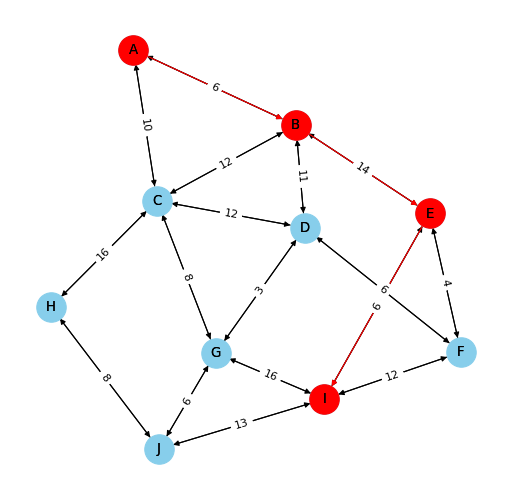

Найден альтернативный маршрут с ценностью 33.
A -> B -> D -> F -> E -> I


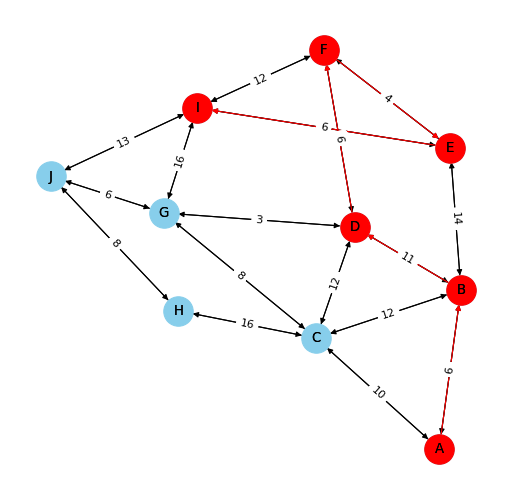

Найден альтернативный маршрут с ценностью 34.
A -> C -> G -> I


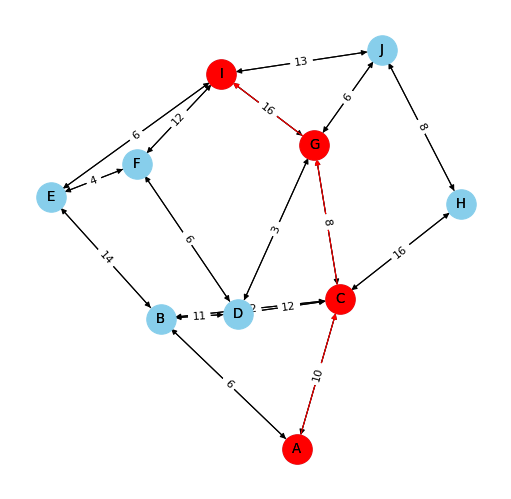

Найден альтернативный маршрут с ценностью 35.
A -> B -> D -> F -> I


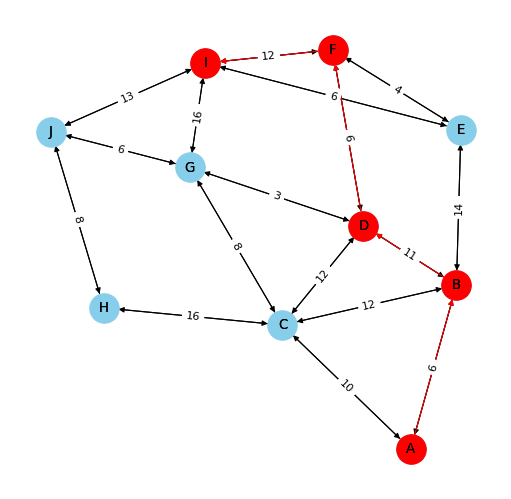

In [7]:
def yenKSP(Craph, start, sink, k):
    paths = []
    paths_leng = []
    paths.append(nx.shortest_path(G, source=start, target=sink, weight='weight'))
    paths_leng.append(nx.shortest_path_length(G, source=start, target=sink, weight='weight'))
    candidates = []
    candidates_leng = []
    for K in range(1, k):
        for j in range(len(paths[K-1])-1):
            root_path = []
            root_leng = 0
            copyGraph = Craph.copy()
            if j > 0:
                m = 0
                while m <= j-1:
                    root_path.append(paths[K-1][m])
                    root_leng += copyGraph.edges[paths[K-1][m],paths[K-1][m+1]]['weight']
                    copyGraph.remove_node(paths[K-1][m])
                    m += 1
            copyGraph.remove_edge(paths[K-1][j], paths[K-1][j+1])
            try:
                spur_path = nx.shortest_path(copyGraph, source=paths[K-1][j], target=sink, weight='weight')
                spur_leng = nx.shortest_path_length(copyGraph, source=paths[K-1][j], target=sink, weight='weight')
            except nx.NetworkXNoPath:
                spur_path = []
                spur_leng = 0
            if spur_path == []:
                continue
            total_path = []
            total_path.extend(root_path)
            total_path.extend(spur_path)
            total_leng = root_leng + spur_leng
            try:
                index = candidates.index(total_path)
            except ValueError:
                index = -1
            if index == -1:
                candidates.append(total_path)
                candidates_leng.append(total_leng)
        
        min_leng = min(candidates_leng)
        index = candidates_leng.index(min_leng)
        index_check = 0
        while index_check!=-1:
            try:
                index_check = paths.index(candidates[index])
            except ValueError:
                index_check = -1
            if index_check != -1:
                candidates.pop(index)
                candidates_leng.pop(index)
                min_leng = min(candidates_leng)
                index = candidates_leng.index(min_leng)
        paths.append(candidates[index])
        paths_leng.append(candidates_leng[index])
        candidates.pop(index)
        candidates_leng.pop(index)
    
    path_k = {}
    for i in range(len(paths)):
        path_k[tuple(paths[i])] = paths_leng[i]
    
    return path_k


def print_graph(matrix, path, dist_path):
    temp =[]
    for z in range(len(path)):
        temp = path[z]
        G = nx.DiGraph()
        H = nx.DiGraph()
        for el1, vector in enumerate(matrix):
            for el2, w in enumerate(vector):
                if w > 0:
                    G.add_edge(chr(el1+65), chr(el2+65), weight=w)
        for i in range(len(temp)-1):
            for el1, vector in enumerate(matrix):
                if el1 == temp[i]:
                    for el2, w in enumerate(vector):
                        if el2 == temp[i+1]:
                            H.add_edge(chr(el1+65), chr(el2+65), weight=w)
        edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
        node_labels = {node:node for node in G.nodes()}

        # Установка параметров вывода
        plt.figure(num=None, figsize=(8, 8), dpi=80)
        pos = nx.spring_layout(G)

        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(G, pos, labels=node_labels)
        nx.draw(G, pos, node_size = 700, node_color = '#87CEEB')

        nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(H, pos, labels=node_labels)
        nx.draw(H, pos, node_size = 700, node_color = '#FF0000', edge_color='#FF0000')
        
        if z == 0:
            print("Найден следующий лучший маршрут с ценностью {}.".format(dist_path[z]))
        else:
            print("Найден альтернативный маршрут с ценностью {}.".format(dist_path[z]))
        shortcut = copy.deepcopy(temp)
        for i in range (len(shortcut)):
            shortcut[i] = chr(shortcut[i]+65)
        print(" -> ".join(shortcut))
        
        plt.show()

def G_graph(matrix):
    G = nx.DiGraph()
    for el1, vector in enumerate(matrix):
        for el2, w in enumerate(vector):
            if w > 0:
                G.add_edge(chr(el1+65), chr(el2+65), weight=w)
    return G

def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix



matrix = read_matrix('../Lab6_matrix/1.txt')
for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = 0

G = G_graph(matrix)

K = 4
dictionary = yenKSP(G, 'A', 'I', K) #<----------- Установка координат

path = []
dist_path = []
temp = []
path = list(dictionary.keys())
for el1, vector in enumerate(path):
    for el2, w in enumerate(vector):
        temp.append(ord(w)-65)
    if len(path) == 1:
        path = temp
    else:
        path[el1] = temp
    temp = []

dist_path = list(dictionary.values())
print_graph(matrix, path, dist_path)

### Вывод